# Bose-Hubbard Model
*****
The Bose-Hubbard Hamiltonian is given by: $$\hat{H}=-J\sum_{\langle i,j\rangle}\left(\hat{b}_{i}^\dagger\hat{b}_{j}+\hat{b}_{i}\hat{b}_{j}^\dagger\right)+\frac{U}{2}\sum_{i} \hat{n}_i\left(\hat{n}_i-\hat{I}\right)+V\sum_{\langle i,j\rangle}\hat{n}_i\hat{n}_j-\mu\sum_{i}\hat{n}_i \$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [3]:
basis1 = basis(2,0)
basis2 = basis(2,1)
def number(N):
    return(create(N)*destroy(N))
number(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]

In [4]:
def ldestroy(N,Sites,Particles):
    l=[]
    for i in range(N):
        l.append(identity(Particles+1))
    l.append(destroy(Particles+1))
    for i in range(Sites-N-1):
        l.append(identity(Particles+1))
    if len(l) == 1:
        s=l[0]
    elif len(l) > 1:
        s=l[0]
        a=0
        ints=[]
        for i in range(len(l)-1):
            s=tensor(s,l[i+1])
            ints.append(s)
    return(s)
    
ldestroy(0,1,3)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]

In [5]:
def lcreate(N,Sites,Particles):
    return(ldestroy(N,Sites,Particles).dag())

In [6]:
alphabetdictionary = {'A':10,'B':11,'C':12,'D':13,'E':14,'F':15,'G':16,'H':17,'I':18,'J':19,'K':20,'L':21,'M':22,'N':23,'O':24,'P':25,'Q':26,'R':27,'S':28,'T':29,'U':30,'V':31,'W':32,'X':33,'Y':34,'Z':35}

In [21]:
def particlecount(Hildim,MaxParticles):
    particles=[]
    for i in range(Hildim):
        binaryn = np.base_repr(i,MaxParticles+1)
        totalnumber=0
        for j in binaryn:
            try:
                int(j)
                totalnumber+=int(j)
            except ValueError:
                j = alphabetdictionary[str(j)]
                totalnumber+=int(j)
        particles.append(totalnumber)
    return(particles)

particlecount(8,1)

[0, 1, 1, 2, 1, 2, 2, 3]

In [26]:
def BHHam(Sites,MaxParticles,particleconserving=False,J=1,U=2,V=0,mu=1):
    def a(Location):
        return(ldestroy(Location,Sites,MaxParticles))
    def adag(Location):
        return(lcreate(Location,Sites,MaxParticles))
    def n(Location):
        return(lcreate(Location,Sites,MaxParticles)*ldestroy(Location,Sites,MaxParticles))
    sum1=0
    sum2=0
    sum3=0
    sum4=0
    for i in range(Sites-1):
        sum1 += adag(i)*a(i+1) + a(i)*adag(i+1)
    for i in range(Sites):
        sum2 += Qobj(n(i).data*(n(i).data-identity(n(i).shape[0]).data))
    for i in range(Sites-1):
        sum3 += n(i)*n(i+1)
    for i in range(Sites):
        sum4 += n(i)
    if sum1 == 0:
        sum1 = Qobj(np.zeros(sum2.shape))
    if sum3 == 0:
        sum3 = Qobj(np.zeros(sum2.shape))
    H = Qobj(-J*sum1.data + U/2*sum2.data + V*sum3.data - mu*sum4.data)
    ##This below describes what happens if we want the space to be total particle conserving
    if particleconserving==True:
        removecolumn=[]
        H = H.full()
        for i in particlecount((MaxParticles+1)**Sites,MaxParticles):
            if i==MaxParticles:
                removecolumn.append(0)
            else:
                removecolumn.append(1)
        for i in range(len(removecolumn)-1,-1,-1): #This iterates backwards to easily remove columns
            if removecolumn[i]==1:
                H=np.delete(H,i,0)
                H=np.delete(H,i,1)
        H = Qobj(H)    
    return(H)

BHHam(2,3,False,1,1,1,1)

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.41421356e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.44089210e-16
   0.00000000e+00  0.00000000e+00 -1.73205081

In [54]:
H = BHHam(3,4,True)
H

Quantum object: dims = [[15], [15]], shape = (15, 15), type = oper, isherm = True
Qobj data =
[[ 8.00000000e+00 -2.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.00000000e+00  2.00000000e+00 -2.44948974e+00  0.00000000e+00
   0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.44948974e+00  1.77635684e-15 -2.44948974e+00
   0.00000000e+00  0.00000000e+00 -1.41421356e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.44948974e+00  2.00000000e+00
  -2.00000000e+00  0.00000000e+00  0.00000000e+00 -1.73205081e+00
   0.00000000e+00  0.000000

In [ ]:
H.eigenstates()

# Part 6: Plotting  Eigenvalues

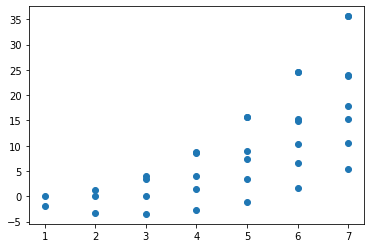

In [52]:
xdata=[]
ydata=[]
for N in range(1,8):
    E = BHHam(2,N,True,1,2,0,1).eigenenergies()
    for i in E:
        xdata.append(N)
        ydata.append(i)
        
plt.scatter(xdata,ydata)

Take eigenvalues for different values of 
x-axis: number of particles in well
y-axis: eigenvalues (Stacked on top of each other)